<H1><u>Preprocessing:</u></H1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ajiteshshree/Churn_Modelling/main/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.set_index('RowNumber')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [5]:
X = df.drop(['Exited', 'CustomerId', 'Surname','RowNumber'],axis=1)
y = df['Exited']

In [7]:
print(pd.DataFrame(X))
print()
print(y)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [8]:
A = pd.get_dummies(X)
A.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [9]:
#Split Dataset
from sklearn.model_selection import train_test_split

In [10]:
A_train,A_test,y_train,y_test = train_test_split(A,y, test_size = 0.2, random_state=0)

In [11]:
#Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
A_train = ss.fit_transform(A_train)
A_test = ss.fit_transform(A_test)

<H1><u>Building a model:</u></H1>

In [13]:
!pip install keras

In [14]:
!pip install tensorflow

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=4673da8f576dd7a1e09223b80ffa0c7afaafd39c0dfafd427fb78c025c8b44ed
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
#initializing our ANN model 
classifier = Sequential()

In [21]:
A_train.shape[1]

13

In [29]:
#adding input layer and first ANN layer
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))

In [30]:
#adding second layer
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu'))

In [31]:
#output layer
classifier.add(Dense(1,kernel_initializer = 'uniform', activation = 'sigmoid' ))

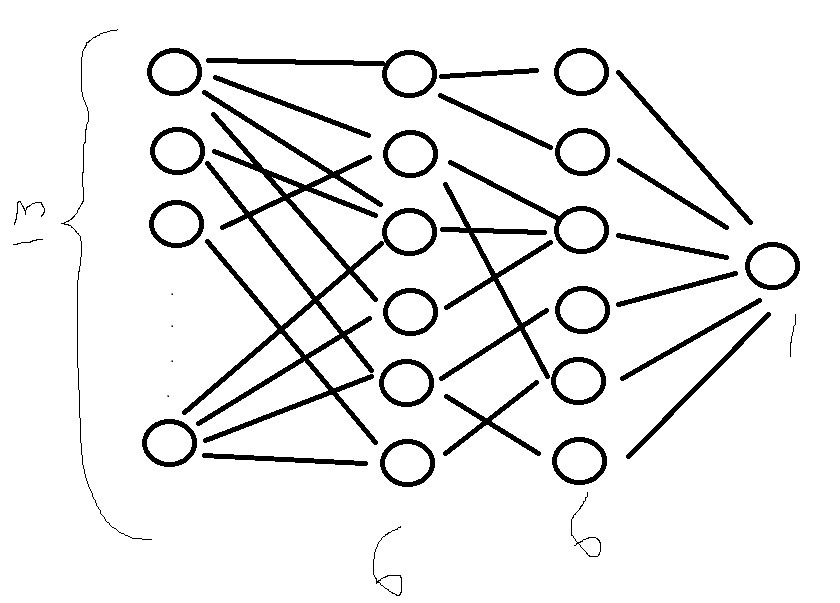

In [46]:
#compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
#fitting
classifier.fit(A_train,y_train, batch_size = 10, epochs = 100)
#batch size 10 means after 10 rows, gradient would update weights and baises
# nb_epoch 100 means model will go through dataset 100 times

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.4787 - accuracy: 0.7960
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4220 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3921 - accuracy: 0.7960
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.7960
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3754 - accuracy: 0.8409
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8530
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3646 - accuracy: 0.8571
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3611 - accura

In [48]:
#predict
y_pred = classifier.predict(A_test)

63/63 [==============================] - 0s 1ms/step


In [49]:
y_pred

array([[0.23956658],
       [0.3230105 ],
       [0.16607876],
       ...,
       [0.23650508],
       [0.14774707],
       [0.1982958 ]], dtype=float32)

In [50]:
y_pred = (y_pred>0.5)

In [51]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [44]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

In [52]:
confusion_metric = confusion_matrix(y_test,y_pred)
confusion_metric

array([[1535,   60],
       [ 218,  187]], dtype=int64)

In [53]:
#accuracy
from sklearn.metrics import accuracy_score

In [54]:
accuracy = accuracy_score(y_test,y_pred)
accuracy 

0.861